In [16]:
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold

# Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
from imblearn.over_sampling import SMOTE

# Î™®Îç∏ ÌèâÍ∞Ä
from sklearn.metrics import roc_auc_score

# Îî•Îü¨Îãù Î™®Îç∏ (TensorFlow)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# "UID" Ïª¨Îüº Ïú†ÏßÄ (Ï†úÏ∂ú ÌååÏùºÏö©)
test_uid = test_df[["UID"]]

# "UID" Ïª¨Îüº ÏÇ≠Ï†ú
train_df.drop(columns=["UID"], inplace=True)
test_df.drop(columns=["UID"], inplace=True)

# X, y Î∂ÑÎ¶¨
X = train_df.drop(columns=["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"])
y = train_df["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"]

In [5]:
categorical_cols = ["Ï£ºÍ±∞ ÌòïÌÉú", "ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"]

# ÎùºÎ≤® Ïù∏ÏΩîÎî© (ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò)
label_enc = LabelEncoder()
X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.fit_transform(X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])
test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.transform(test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])

# Ïõê-Ìï´ Ïù∏ÏΩîÎî© Ï†ÅÏö©
X = pd.get_dummies(X, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=True)

In [6]:
# Î°úÍ∑∏ Î≥ÄÌôò
log_columns = ["ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°", "Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°", "ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°"]
for col in log_columns:
    X[col] = np.log1p(X[col])
    test_df[col] = np.log1p(test_df[col])

# "ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"Í∞Ä 0Ïù¥Î©¥ "Ïó∞Ï≤¥ ÏóÜÏùå" Ïª¨Îüº Ï∂îÍ∞Ä
X["Ïó∞Ï≤¥ ÏóÜÏùå"] = (X["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)
test_df["Ïó∞Ï≤¥ ÏóÜÏùå"] = (test_df["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)

In [7]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test_df)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled = scaler.transform(test_imputed)

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [13]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

üîÑ Fold 1 ÏãúÏûë
Epoch 1/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 3ms/step - accuracy: 0.5033 - loss: 0.8022 - val_accuracy: 0.5110 - val_loss: 0.7239
Epoch 2/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5081 - loss: 0.7474 - val_accuracy: 0.5307 - val_loss: 0.7010
Epoch 3/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5211 - loss: 0.7277 - val_accuracy: 0.5675 - val_loss: 0.6888
Epoch 4/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5302 - loss: 0.7114 - val_accuracy: 0.5907 - val_loss: 0.6818
Epoch 5/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.5288 - loss: 0.6992 - val_accuracy: 0.5960 - val_loss: 0.6770
Epoch 6/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 5ms/step - accuracy: 0.5471 - loss: 0.6935 - val_acc

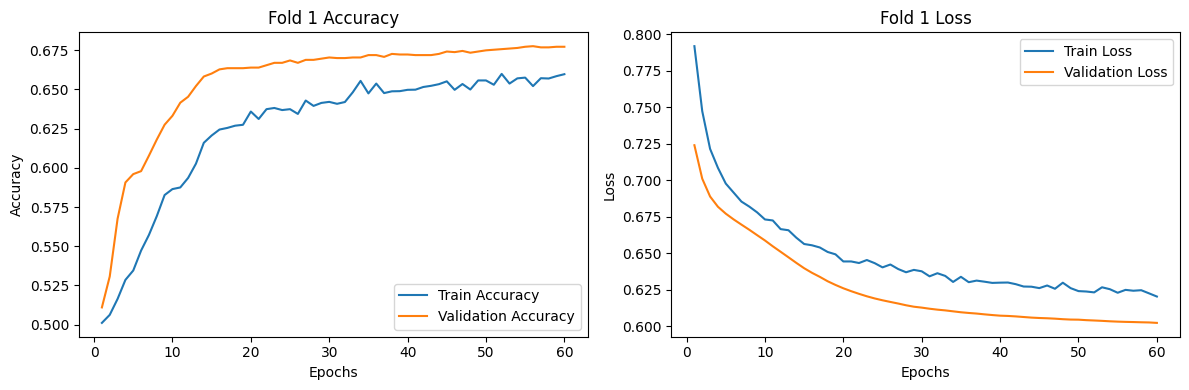

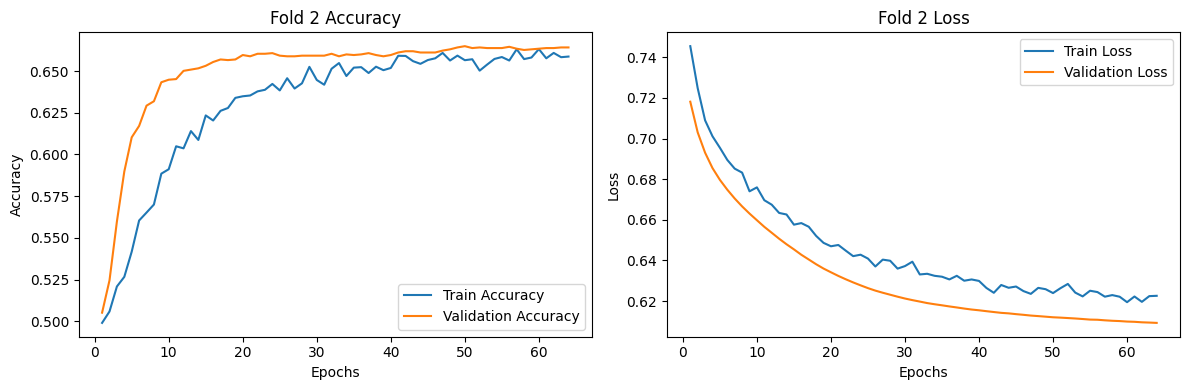

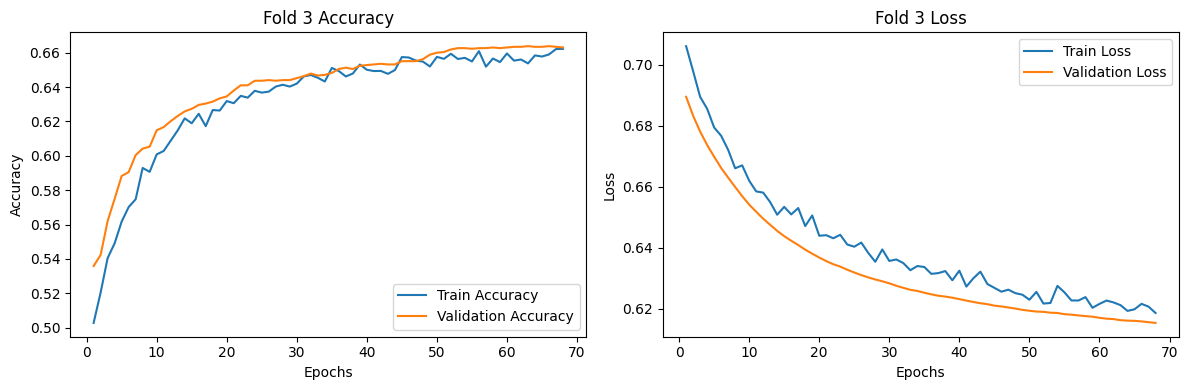

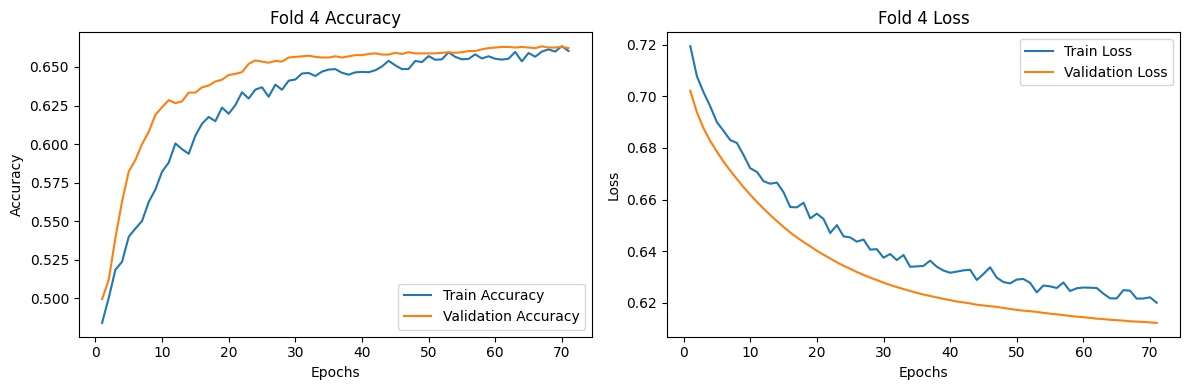

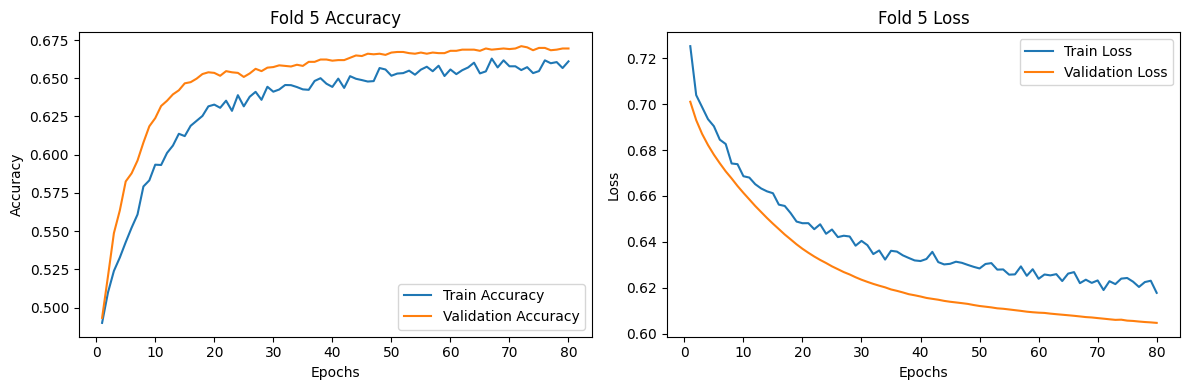

In [17]:
# FoldÎ≥Ñ AccuracyÏôÄ Loss Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
all_history = []  # Ïù¥ Ï§ÑÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ all_historyÎ•º Î™ÖÌôïÌûà Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
roc_auc_scores = []

for train_index, valid_index in kf.split(X_resampled):
    print(f"üîÑ Fold {fold} ÏãúÏûë")

    # ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X_train_fold, X_valid_fold = X_resampled[train_index], X_resampled[valid_index]
    y_train_fold, y_valid_fold = y_resampled[train_index], y_resampled[valid_index]

    # Î™®Îç∏ Ï†ïÏùò
    model = keras.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=(X_train_fold.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    # Ï°∞Í∏∞ Ï¢ÖÎ£å ÏΩúÎ∞± ÏÑ§Ï†ï
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        min_delta=0.001,
        restore_best_weights=True
    )

    # Î™®Îç∏ ÌïôÏäµ
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_valid_fold, y_valid_fold),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # FoldÏùò ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•
    all_history.append(history.history)  # FoldÎ≥Ñ ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_valid_pred = model.predict(X_valid_fold).flatten()
    roc_auc = roc_auc_score(y_valid_fold, y_valid_pred)
    print(f"Fold {fold} Validation ROC-AUC: {roc_auc:.4f}")
    roc_auc_scores.append(roc_auc)
    fold += 1

# ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† ROC-AUC: {np.mean(roc_auc_scores):.4f}")

# ÏãúÍ∞ÅÌôî: FoldÎ≥Ñ AccuracyÏôÄ Loss
for i, history in enumerate(all_history):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [18]:
y_test_pred = model.predict(test_scaled).flatten()  # ÌôïÎ•† Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

# Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    "UID": test_uid["UID"],
    "Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÌôïÎ•†": y_test_pred  # ÌôïÎ•†Í∞íÏùÑ Í∑∏ÎåÄÎ°ú Ï†ÄÏû•
})

# CSV Ï†ÄÏû•
submission.to_csv("submission.csv", index=False)

print("‚úÖ Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å! 'submission.csv' Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

65/65 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
‚úÖ Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å! 'submission.csv' Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
